In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', 
                 header=None, sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


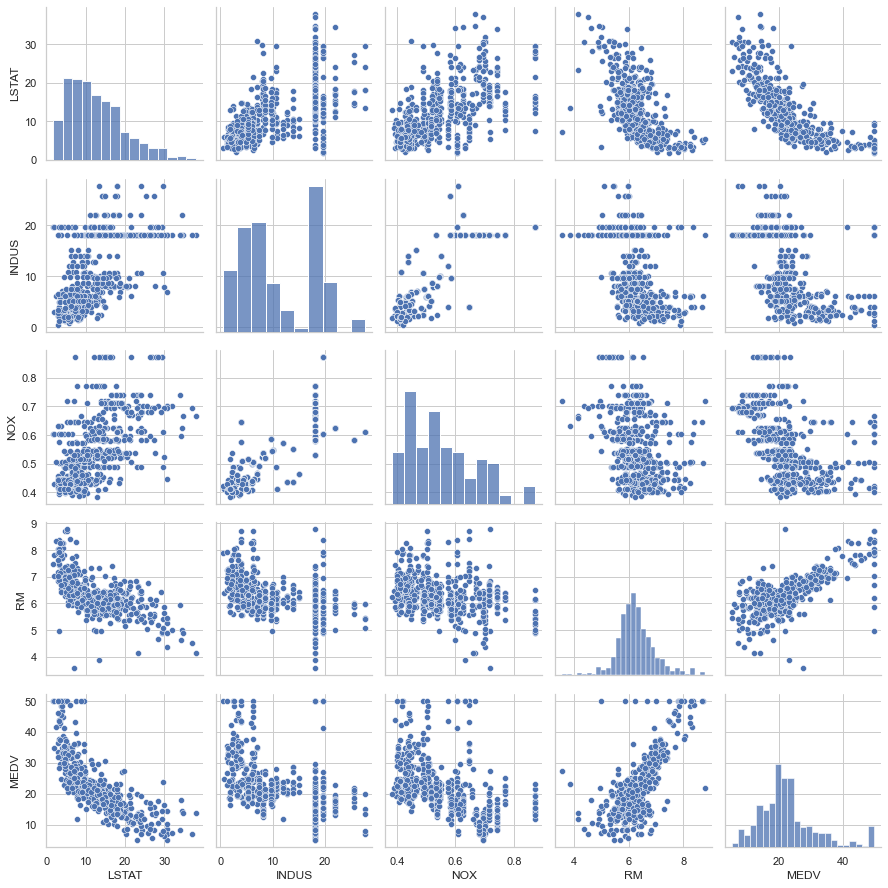

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.show()

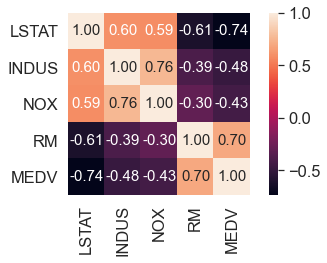

In [3]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols,
            xticklabels=cols)

plt.tight_layout()
plt.show()

In [4]:
class LinearRegressionGD():

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros((X.shape[1], 1))
        self.b = 0
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[:] += self.eta * X.T.dot(errors)
            self.b += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b

    def predict(self, X):
        return self.net_input(X)

In [5]:
x = df[['RM']].values
y = df[['MEDV']].values
x1 = df[['RAD']].values
y1 = df[['NOX']].values

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(x)
y_std = sc_y.fit_transform(y)

sc_x1 = StandardScaler()
sc_y1 = StandardScaler()
X1_std = sc_x1.fit_transform(x1)
y1_std = sc_y1.fit_transform(y1)

In [7]:
lr = LinearRegressionGD()
lr.fit(X_std, y_std)
lr1 = LinearRegressionGD()
lr1.fit(X1_std, y1_std)

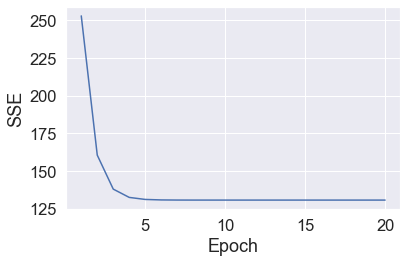

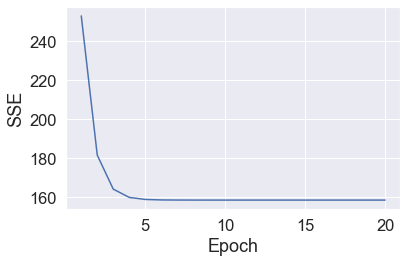

In [15]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

plt.plot(range(1, lr1.n_iter+1), lr1.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

In [9]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)    
    return

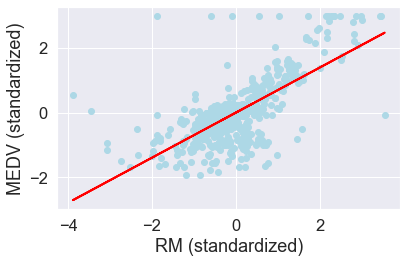

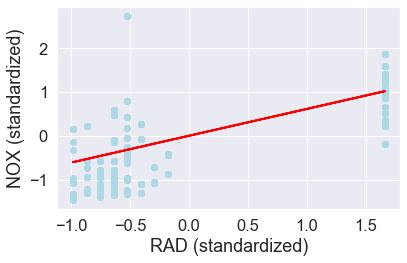

In [18]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('RM (standardized)')
plt.ylabel('MEDV (standardized)')
plt.tight_layout()
plt.show()

lin_regplot(X1_std, y1_std, lr1)
plt.xlabel('RAD (standardized)')
plt.ylabel('NOX (standardized)')
plt.tight_layout()
plt.show()

In [19]:
print('Slope: %.3f' % lr.w_)
print('Intercept: %.3f' % lr.b)

print('Slope: %.3f' % lr1.w_)
print('Intercept: %.3f' % lr1.b)

Slope: 0.695
Intercept: -0.000
Slope: 0.611
Intercept: -0.000


In [22]:
arr = np.array([5.0])
num_rooms_std = sc_x.transform(arr.reshape(-1, 1))
price_std = lr.predict(num_rooms_std)
print("Price in $1000's: %.3f" % sc_y.inverse_transform(price_std))

rads_std = sc_x1.transform(arr.reshape(-1, 1))
nox_std = lr1.predict(rads_std)
print("NOX: %.3f" % sc_y1.inverse_transform(nox_std))

Price in $1000's: 10.840
NOX: 0.518


In [23]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x, y)
y_pred = slr.predict(x)
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

slr1 = LinearRegression()
slr1.fit(x1, y1)
y_pred = slr1.predict(x1)
print('Slope: %.3f' % slr1.coef_[0])
print('Intercept: %.3f' % slr1.intercept_)

Slope: 9.102
Intercept: -34.671
Slope: 0.008
Intercept: 0.477


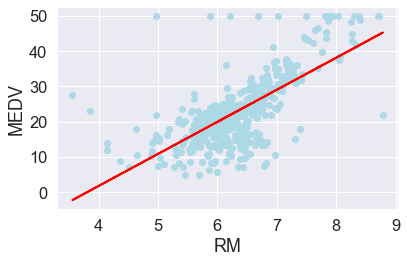

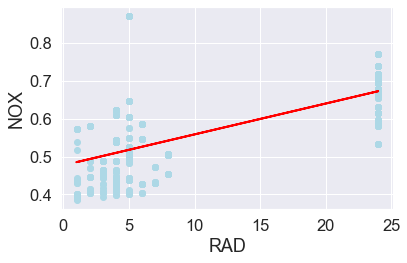

In [25]:
lin_regplot(x, y, slr)
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

lin_regplot(x1, y1, slr1)
plt.xlabel('RAD')
plt.ylabel('NOX')
plt.tight_layout()
plt.show()